# Assignment 2

## Applying a neural network to a business problem
### Part 1:  Classification problem

Insert your code after `# YOUR CODE HERE`.  
**NOTE:** This notebook will be graded.

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('Mamo_data.csv', delimiter = ",")

In [3]:
# Explore the size of the data set
# YOUR CODE HERE
df.shape

(830, 11)

In [4]:
# Explore type of data and feature names
# YOUR CODE HERE
df.columns

Index(['malignanttrue', 'score', 'age', 'shape2', 'shape3', 'shape4',
       'margin2', 'margin3', 'margin4', 'margin5', 'density'],
      dtype='object')

In [5]:
df.dtypes

malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object

Choose `malignanttrue` as the `y` variable, and the rest of the variables except the unnamed column as `X` variables.
**Note:** For the response variable, 0 = FALSE (normal) and 1 = TRUE (malignant).

In [6]:
# Split data into features (X) and response (y)
# YOUR CODE HERE
y = df['malignanttrue']
X = df.drop(columns=['malignanttrue'])

In [7]:
# Explore type of data and feature names
# You can use df.head() or df.tail() to see the first or last few records, respectively.
# However, if data is sorted, it is better to view some randomly sampled records
df.sample(10, random_state=0)

,malignanttrue,score,age,shape2,shape3,shape4,margin2,margin3,margin4,margin5,density
647,1,5,66,0,0,1,0,0,1,0,3
31,0,3,49,0,0,1,0,0,1,0,3
474,0,4,48,0,0,1,0,0,0,1,3
8,0,2,23,0,0,0,0,0,0,0,3
382,1,4,46,0,1,0,0,0,0,0,3
255,1,4,50,1,0,0,0,0,0,0,3
672,1,5,74,0,0,1,0,1,0,0,3
679,1,5,74,0,0,1,0,0,1,0,3
196,0,4,70,0,0,0,0,0,0,0,1
652,1,5,54,0,0,1,0,0,1,0,3


In [8]:
# Change the array shape of the output from a dataframe single column vector
# to a contiguous flattened array
# YOUR CODE HERE
y = y.values.ravel()

In [9]:
# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scale the data in the next cell.  
Use the variable names `X_train` and `X_test`.

In [10]:
# Scale the data
scaler = StandardScaler()  

# Remember to fit using only the training data
# YOUR CODE HERE
X_train = scaler.fit_transform(X_train)

# Apply the same transformation to test data
# YOUR CODE HERE
X_test = scaler.transform(X_test)

Next, fit a two-layer MLP classifier with 5 nodes on each layer.

In [11]:
reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
    
# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

0.8461538461538461

Can you get a better accuracy? More nodes on each layer could lead to overfitting. Fewer nodes could make the model too sparse. Use cross validation to find the optimal number of nodes per layer.

In [12]:
# Fit and check accuracy for various numbers of nodes on both layers
# Note that this will take some time
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,6) for j in range(3,6)]:

    reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(3, 3) : 0.82476
(3, 4) : 0.83762
(3, 5) : 0.82637
(4, 3) : 0.81511
(4, 4) : 0.82476
(4, 5) : 0.81350
(5, 3) : 0.81672
(5, 4) : 0.81994
(5, 5) : 0.82637


In [13]:
# Check scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

The highest validation score is: 0.8376
This corresponds to nodes (3, 4)


Use the tuple that was printed for `optimal_hidden_layer_sizes` to construct the first of two lines of code to fit data with the best parameter.
For the first line, complete the following code in the code cell below: 
```
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(?,?), random_state=1)
```

In [14]:
# Fit data with best parameter
# YOUR CODE HERE
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=optimal_hidden_layer_size, random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 4), max_iter=1000, random_state=1)

In [15]:
# Predict
y_pred = clf.predict(X_test)
# Accuracy 
accuracy_score(y_pred,y_test)

0.8269230769230769

For the response curves, categorical variables should be fixed at distinct values. By fixing the margin variable at its first unique value, its second unique value, and so on, the response curves show the effect for various levels of the margin variable. 

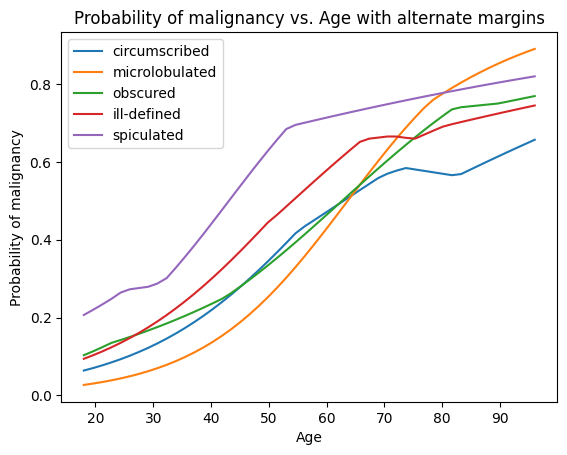

In [16]:
# Visualise probability of malignancy vs age with alternate margins
# Copy dataframe so as not to change the original, and obtain means
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.mean()).transpose()

# Different probabilities for different margins
margin= range(4,9)

for i in margin: 
    # Change margins
    X_design_vec.loc[0,["margin2","margin3","margin4","margin5"]]=[0,0,0,0]
    if i!=4:
        X_design_vec.iloc[0,i]=1
    
    # Find the min and max of the desired feature and set up a sequence
    min_resultant = min(X.loc[:,"age"])
    max_resultant = max(X.loc[:,"age"])
    seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0,"age"] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = clf.predict_proba(to_predict)

    # Plot 
    plt.plot(seq,predictions[:,1])
plt.xlabel("Age")
plt.ylabel("Probability of malignancy")
plt.title("Probability of malignancy vs. Age with alternate margins")
plt.legend(labels=["circumscribed","microlobulated","obscured","ill-defined","spiculated"],loc='best')
plt.show()

### Now answerr the following questions about this notebook for Part 1.

#### Question 1
The biomedical industry uses machinery to capture images and other data, and also software that provides the specialist with information to make decisions. These software applications often use vast data sets such as the mammogram data set you used in the notebook. 

- Consider the medical data and the context in which it is used. Why is machine learning, and specifically neural networks, an appropriate method for prediction in these circumstances? `(Max. 200 words)`

     ```ANSWER:```
Machine learning, especially neural networks like the MLPClassifier, is well-suited for medical data because it can handle large, complex datasets and find patterns that are difficult for humans to detect (Abut et al., 2024). In the biomedical industry, where data comes from various sources like medical images (e.g., mammograms) and patient information, the relationships between data points are not always obvious.

Neural networks are powerful because they can automatically learn these relationships. For example, in a mammogram dataset, there are many variables like age, breast tissue density, and the shape of masses in the image. Neural networks can process this information and identify patterns that might indicate whether a mass is malignant (cancerous) or benign (non-cancerous) (Zhang et al., 2019).

The ability to make accurate predictions based on historical data can support doctors in making better decisions. In a field where early detection is critical, machine learning helps improve the speed and accuracy of diagnoses, ensuring that patients receive timely and effective treatment. Neural networks are also flexible—they can be trained on new data as technology and medical knowledge evolve, making them highly adaptable in the ever-changing medical field.

**References**
- Abut, S., Okut, H., Zackula, R., & James Kallail, K. (2024). Deep Neural Networks and Applications in Medical Research. IntechOpen. doi: 10.5772/intechopen.112371

- Zhang, S., Han, F., Liang, Z., Tan, J., Cao, W., Gao, Y., Pomeroy, M., Ng, K., & Hou, W. (2019). An investigation of CNN models for differentiating malignant from benign lesions using small pathologically proven datasets. Computerized Medical Imaging and Graphics, 77. https://doi.org/10.1016/j.compmedimag.2019.101645

#### Question 2

- What is the purpose of a response curve in the context of neural networks? What insights can be gained from the response curves you generated in this IDE notebook? `(Max. 200 words)`

     ```ANSWER:```
The response curve in the context of neural networks shows how the model’s predictions change when the input values are adjusted (Kisilevich, 2023). In the above response curve, the curve demonstrates how the probability of malignancy changes as a function of age, with different lines representing various tumor margin types (like circumscribed, spiculated, etc.).

By observing it, we can draw the following conclusions:

- ***Spiculated (purple) and ill-defined (red)*** margins show a high probability of malignancy even at younger ages, suggesting that these margin types are strong indicators of cancer.

- ***Microlobulated (orange)*** margins start with low probabilities but increase sharply with age, suggesting malignancy becomes more likely for older patients with this margin type.

- ***Circumscribed (blue)*** has the lowest probability of malignancy across ages, indicating it might be associated with less aggressive or benign cases.

These curves help doctors and specialists understand how different tumor characteristics interact with patient age to predict cancer risk. Machine learning models like neural networks can capture these complex patterns from large datasets, aiding in decision-making by highlighting key factors influencing outcomes (Alfayez et al., 2021). This type of analysis ensures that predictions are aligned with both data and medical knowledge.

**Reference**
- Kisilevich, S. (2023, June 11). Exploring different approaches to generate response curves in marketing mix modeling. Medium. https://towardsdatascience.com/exploring-different-approaches-to-generate-response-curves-in-marketing-mix-modeling-ff6dcc7927f7
- Abdullah Alfayez, A., Kunz, H., & Grace Lai, A. (2021). Predicting the risk of cancer in adults using supervised machine learning: a scoping review. BMJ open, 11(9), e047755. https://doi.org/10.1136/bmjopen-2020-047755

### Part 2: Use Python to perform K-means clustering to inform a business case

In [17]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np

In [18]:
# Import data
df = pd.read_csv("online_shoppers_intention.csv",delimiter=",")

# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

Removed 14 samples
(12316, 18)


In [19]:
# Explore type of data and feature names
df.sample(8)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1209,0.0,0.00,0.0,0.0,5.0,52.000000,0.000000,0.020000,0.000000,0.0,Mar,2,4,7,2,Returning_Visitor,False,False
12066,0.0,0.00,0.0,0.0,44.0,2588.154762,0.009091,0.027273,0.000000,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
11423,0.0,0.00,0.0,0.0,55.0,2415.416667,0.000000,0.019811,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,True,False
2868,2.0,37.50,0.0,0.0,10.0,573.166667,0.000000,0.045000,0.000000,0.0,May,3,2,7,3,Returning_Visitor,False,False
8785,4.0,73.50,0.0,0.0,59.0,4679.029167,0.009617,0.032389,0.000000,0.0,Dec,2,2,1,13,Returning_Visitor,False,False
4709,0.0,0.00,0.0,0.0,52.0,1622.433333,0.006410,0.031731,0.000000,0.0,May,2,2,3,13,Returning_Visitor,False,False
2001,4.0,73.75,1.0,58.0,12.0,777.500000,0.000000,0.015556,10.782000,0.0,Mar,2,2,1,2,Returning_Visitor,True,True
8733,3.0,99.75,0.0,0.0,31.0,835.583333,0.000000,0.006452,47.448508,0.0,Nov,2,2,1,10,Returning_Visitor,False,True


In [20]:
# Select numerical features for clustering
numerical_features = df[['Administrative', 'Administrative_Duration', 'Informational',
                         'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                         'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

# Handle categorical features
categorical_features = pd.get_dummies(df[['Month', 'VisitorType']], drop_first=True)

# Combine numerical and categorical features
features = pd.concat([numerical_features, categorical_features], axis=1)

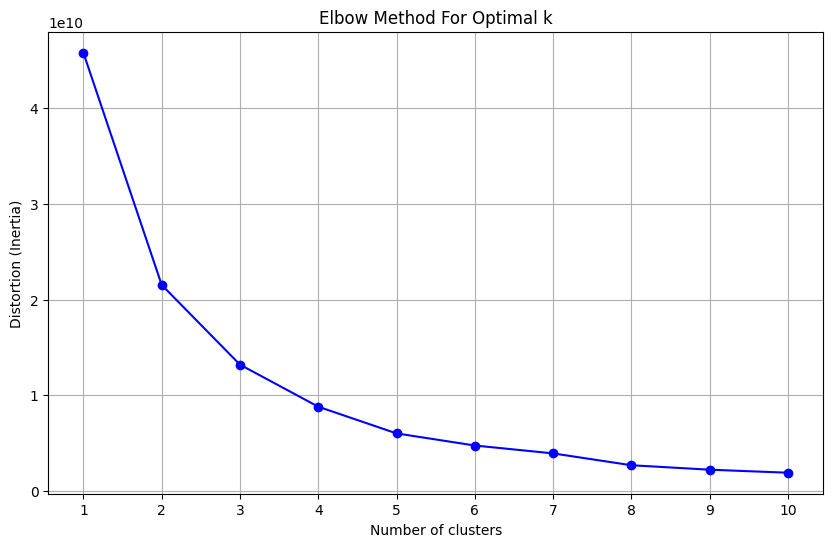

In [21]:
# Find optimal number of clusters

# 1. Elbow method
# Calculate distortions
distortions = []
# YOUR CODE HERE
K = range(1, 11)  # Test for clusters from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_) 

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid()
plt.show()

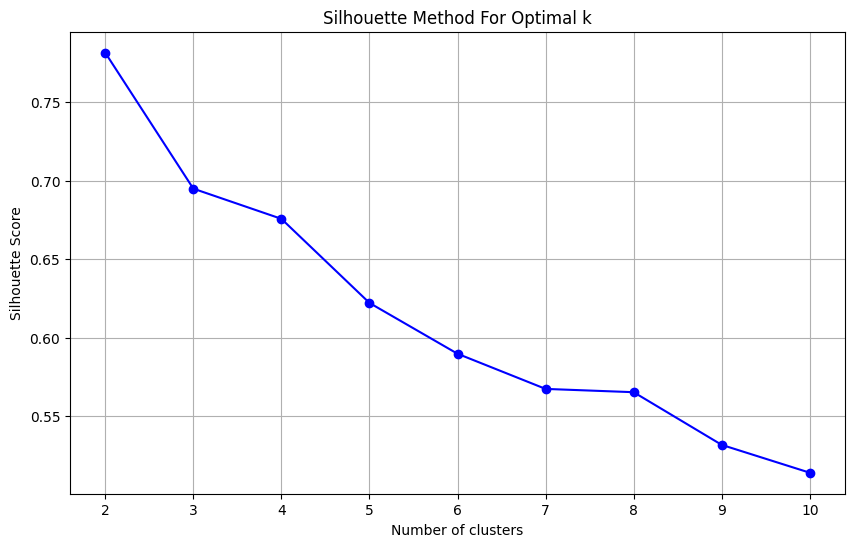

In [22]:
# 2. Silhouette method
sil = []
kmax = 10
# YOUR CODE HERE
for k in range(2, kmax + 1):  # Starting from 2 because silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    sil_score = silhouette_score(features, kmeans.labels_) 
    sil.append(sil_score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, kmax + 1), sil, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.xticks(range(2, kmax + 1))
plt.grid()
plt.show()

Use the output from the elbow or silhouette method to decide how many clusters to use.

In [23]:
# Cluster the data
# Hint: km = KMeans(....) and use init='kmeans++' 
# YOUR CODE HERE
km = KMeans(n_clusters=3, init='k-means++', random_state=0)  # Initialize KMeans with 3 clusters
km.fit(features)  # Fit the model to the features

# Add the cluster labels to the original DataFrame
df['Cluster'] = km.labels_
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


In [24]:
# Check how many observations are in each cluster
# YOUR CODE HERE
cluster_counts = df['Cluster'].value_counts()

# Print the counts for each cluster
print("Number of observations in each cluster:")
print(cluster_counts)

Number of observations in each cluster:
Cluster
0    10134
1     1975
2      207
Name: count, dtype: int64


In [25]:
# Set up a dataframe with cluster allocations
# YOUR CODE HERE
clustered_df = df.copy()
clustered_df['Cluster'] = km.labels_  # Add the cluster labels to the new DataFrame

clustered_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


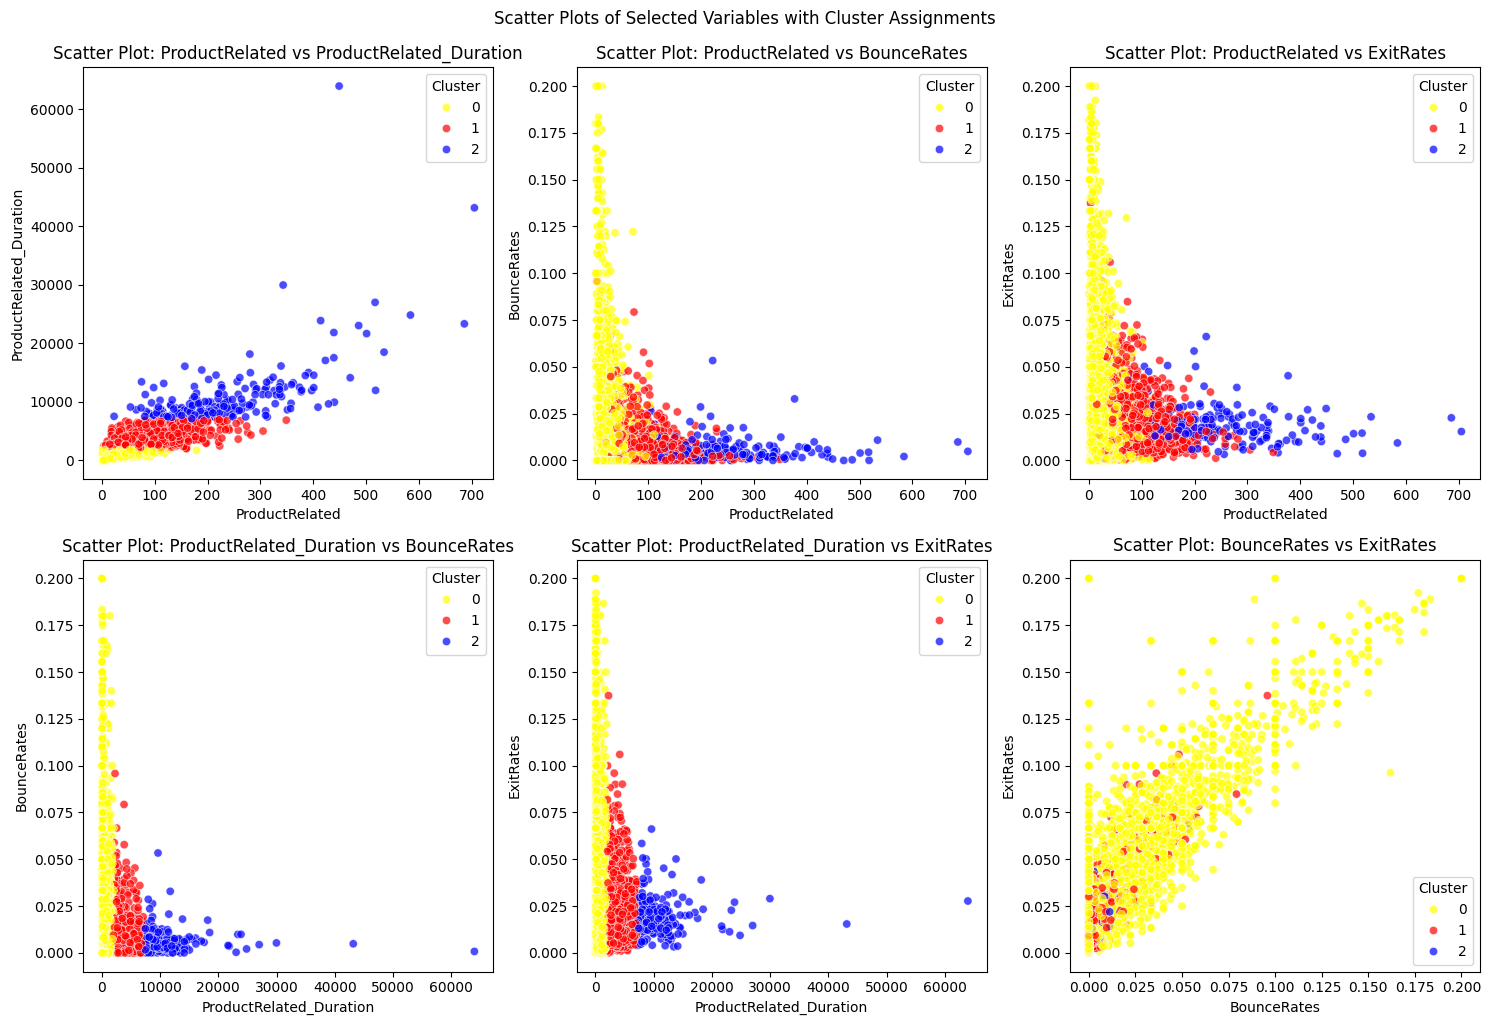

In [26]:
# Plot the following variables and their clusters
var = ['ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates']

# Plot using seaborn
# YOUR CODE HERE

# Specify the variable pairs to plot
var_pairs = [
    ('ProductRelated', 'ProductRelated_Duration'),
    ('ProductRelated', 'BounceRates'),
    ('ProductRelated', 'ExitRates'),
    ('ProductRelated_Duration', 'BounceRates'),
    ('ProductRelated_Duration', 'ExitRates'),
    ('BounceRates', 'ExitRates')
]

custom_palette = {0: 'yellow', 1: 'red', 2: 'blue'}

# Set up the plot
plt.figure(figsize=(15, 10))

# Loop through the variable pairs and create scatter plots
for i, (x_var, y_var) in enumerate(var_pairs, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid
    sns.scatterplot(data=clustered_df, x=x_var, y=y_var, hue='Cluster', palette=custom_palette, alpha=0.7)
    plt.title(f'Scatter Plot: {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.suptitle('Scatter Plots of Selected Variables with Cluster Assignments', y=1.02)
plt.show()

### Now answer the following questions about this notebook for Part 2.

### Question 1	
At the end of the part 2, you created the pair-wise plots. Consider the behaviour of customers in each cluster based on the distribution and scatterplots related to the variable ProductRelated_Duration. 

- What insights can you gain from the scatterplots regarding the difference in behaviour of the different clusters? 
(Max. 300 words)

       ```ANSWER:```
The scatterplots provide insights into the behavior of customers based on how long they interact with product-related pages, as indicated by the variable ProductRelated_Duration. Each plot compares this variable with others, and we can observe clear distinctions between the three customer clusters (yellow for cluster 0, red for cluster 1, and blue for cluster 2).

**ProductRelated vs. ProductRelated_Duration (top left plot)**:

***Cluster 0 (yellow)***: These customers tend to interact with fewer product-related pages but for a moderate amount of time. This may indicate that they spend more time on each page, perhaps because they are more deliberate in reviewing products.

***Cluster 1 (red)***: These customers browse more product-related pages but spend less time on each. This could suggest a quick scanning behavior, where they look at many products but spend less time reviewing individual items.

***Cluster 2 (blue)***: These customers interact with a large number of product-related pages and also spend significant time on them. This indicates that they are highly engaged, likely conducting extensive research before making decisions.

**ProductRelated_Duration vs. BounceRates (bottom left plot)**:

***Cluster 0 (yellow)*** has high bounce rates with lower product-related duration, suggesting that they may leave the website quickly after reviewing only a few pages.

***Cluster 1 (red)*** shows mid-range bounce rates, which aligns with their quick scanning behavior.

***Cluster 2 (blue)*** exhibits the lowest bounce rates and the longest product-related duration, indicating that they are highly engaged and less likely to leave the site abruptly.

**ProductRelated_Duration vs. ExitRates (middle bottom plot)**:

A similar trend is seen here, where ***Cluster 2 (blue)*** again has the lowest exit rates and the longest engagement, while ***Cluster 0 (yellow)*** customers exit more frequently after spending less time.

In summary, **Cluster 2** represents the most engaged group, spending significant time on product pages, with low bounce and exit rates.

___
- Discuss the quality of the clustering solution by referring to the number of observations in each cluster and the distribution of the data along each dimension. How does this affect the way you can interpret the scatterplots? (Max. 200 words)
       
       ```ANSWER:```
The number of observations in each cluster shows an imbalance in the clustering solution: Cluster 0 has 10,134 observations, Cluster 1 has 1,975, and Cluster 2 has only 207.

This uneven distribution can affect how we interpret the scatterplots. Cluster 0 dominates most of the plots (yellow points), and since it has so many points, it might be harder to see patterns or distinguish smaller clusters, especially Cluster 2 (blue points), which has very few observations.

Cluster 2 represents only a small fraction of the total data (207 points), but it shows distinct behavior with longer engagement times (ProductRelated_Duration), lower bounce rates, and fewer exits, making it an important group even though it’s small. However, because it's underrepresented, its influence on the clustering model could be less prominent compared to Cluster 0.

In contrast, Cluster 0 may represent a broader range of customer behaviors because it includes the most observations, making it less distinct.

Overall, while the clustering provides valuable insights, the imbalance in cluster sizes means we should be cautious when interpreting behaviors from smaller clusters, like Cluster 2, since they could be overshadowed by the larger clusters in the scatterplots (Zhou & Sun, 2024).

**References**
- Zhou, Q., & Sun, B. (2024). Adaptive K-means clustering based under-sampling methods to solve the class imbalance problem. Data and Information Management, 8(3). https://doi.org/10.1016/j.dim.2023.100064

### Question 2

Discuss whether the K-means algorithm was an appropriate method for identifying clusters in this particular data set by referring to at least two elements of the data set that contributed to your decision.

The following are some elements that you could take into consideration to justify your answer:
- Discuss the applicability of the K-means algorithm for the number of observations in the data set. Compare this data set with one that has substantially more observations (e.g. 900,000 vs the present 12,000).
- There were some outliers in the data set. How do you think this can influence the predictive capability of the analysis? (Max. 300 words)

       ```ANSWER:```
The K-means algorithm can be an appropriate method for identifying clusters in this dataset, but its suitability depends on several factors. Here are two key elements to consider:

**1. Number of Observations**

***Current Dataset (12,000 observations)***: K-means works well with this size. It can quickly organize the data into clusters without needing a lot of time or computing power (Sreedhar et al., 2017).

***Larger Dataset (900,000 observations)***: If the dataset gets much bigger, K-means can still be useful, but it might take a lot longer to run. The process takes more time and resources as the size of the dataset increases (Gul & Rehman, 2023). However, methods like mini-batch K-means can help by breaking the data into smaller, manageable pieces, making it easier to analyze larger datasets.

**2. Presence of Outliers**

***Impact on Clustering***: K-means can be affected by outliers—these are data points that are very different from the rest. Outliers can skew the results because they can pull the average (mean) of a group away from where most of the data points are located, leading to inaccurate clusters (Gupta et al., 2017).

***Mitigation Strategies***: To handle this, you can identify and remove outliers before running K-means. Alternatively, using different clustering methods like DBSCAN or K-medoids can provide better results since these methods are less influenced by outliers (Sukup, 2018).

**Conclusion**
For the given dataset of 12,000 observations, K-means is generally appropriate, provided that outliers are managed effectively. For much larger datasets, while K-means can still be used, considerations around computational efficiency and scalability become more critical. Addressing outliers through preprocessing or alternative algorithms can enhance the predictive capability of the analysis.   

**References**
- Sreedhar, C., Kasiviswanath, N. & Chenna Reddy, P. Clustering large datasets using K-means modified inter and intra clustering (KM-I2C) in Hadoop. J Big Data 4, 27 (2017). https://doi.org/10.1186/s40537-017-0087-2
- Gul, M., Rehman, M. Big data: an optimized approach for cluster initialization. J Big Data 10, 120 (2023). https://doi.org/10.1186/s40537-023-00798-1
- Gupta, S., Kumar, R., Lu, K., Moseley, B., & Vassilvitskii, S. (2017). Local search methods for k-means with outliers. Proceedings of the VLDB Endowment, 10(7). https://doi.org/10.14778/3067421.3067425
- Sukup, J. (2018, June 1). When K-means clustering fails: Alternatives for segmenting noisy data. Oracle Blogs. https://blogs.oracle.com/ai-and-datascience/post/when-k-means-clustering-fails-alternatives-for-segmenting-noisy-data

### THE END!